# Dataset Visualization and Statistics

This tutorial shows you how to use TGX visualizations and statistics

In [1]:
import tgx
from tgx.utils.plotting_utils import plot_for_snapshots

### Load the dataset

load the [TGB](https://tgb.complexdatalab.com/) datasets in TGX from 
[Temporal Graph Benchmark for Machine Learning on Temporal Graphs (NeurIPS 2023 Datasets and Benchmarks Track)](https://openreview.net/forum?id=qG7IkQ7IBO)

In [2]:
data_name = "tgbl-wiki"
dataset = tgx.tgb_data(data_name) 

raw file found, skipping download
Dataset directory is  /mnt/f/code/TGB/tgb/datasets/tgbl_wiki
loading processed file


load the built-in datasets in TGX from 
[Towards Better Evaluation for Dynamic Link Prediction (NeurIPS 2022 Datasets and Benchmarks Track)](https://openreview.net/forum?id=1GVpwr2Tfdg)

In [3]:
dataset = tgx.builtin.uci() 

Data missing, download recommended!
Will you download the dataset(s) now? (y/N)
y
./data
https://zenodo.org/record/7213796/files/uci.zip
Download started, this might take a while . . .
Download completed


### Discretize the graph for visualization

Discretize the temporal graph into snapshots (equally spaced durations) for visualization purposes

In [7]:
ctdg = tgx.Graph(dataset) # retrieve the continuous time dynamic graph
time_scale = "weekly" #"minutely", "hourly", "daily", "monthly", "yearly", "biyearly"
dtdg, ts_list = ctdg.discretize(time_scale=time_scale, store_unix=True)

Number of loaded edges: 59835
Number of unique edges:20296
Available timestamps:  58911
Discretizing data to 28 timestamps...


<div class="alert alert-block alert-info">
<b>Tip:</b> The discretization function returns the discretized TG as its first argument (`dtdg`) and the remapped unix timestamps as its second argument (`ts_list`). The `dtdg` has integer timestamps (snapshot ids) thus `ts_list` keep tracks of the unix timestamps of all edges in the coarsened time granularity.  
</div>

## TGX Features 

TGX provides a suite of visualizations for analyzing the dynamics of temporal graphs

| Function | Description |
| --- | --- |
| [`tgx.degree_over_time`](#Average-Node-Degree-Over-Time) | plot average node degree over time|
| [`tgx.nodes_over_time`](#Number-of-Nodes-Over-Time) | Plot the number of active nodes in each snapshot |
| [`tgx.edges_over_time`](#Number-of-Edges-Over-Time) | Plot the number of edges in each snapshot |
| [`tgx.nodes_and_edges_over_time`](#Number-of-Nodes-and-Edges-Over-Time) | plot the active number of nodes and edges in the same figure|
| [`tgx.connected_components_per_ts`](#Number-of-Connected-Components) |Plot number of connected components per timestamp. x-axis is the snapshot id (or timestamps), y-axis is the number of connected components|



For each visualization tool, you can specify the output path with `filepath`, otherwise it saves in the current directory. 
<div class="alert alert-block alert-warning">
<b>Example:</b> <code> tgx.degree_over_time(dtdg, network_name=dataset.name, filepath=filepath) </code>
</div> 

### Average Node Degree Over Time

Plot average node degree in each snapshot. x-axis is the snapshot id (or timestamps), y-axis is the average node degree

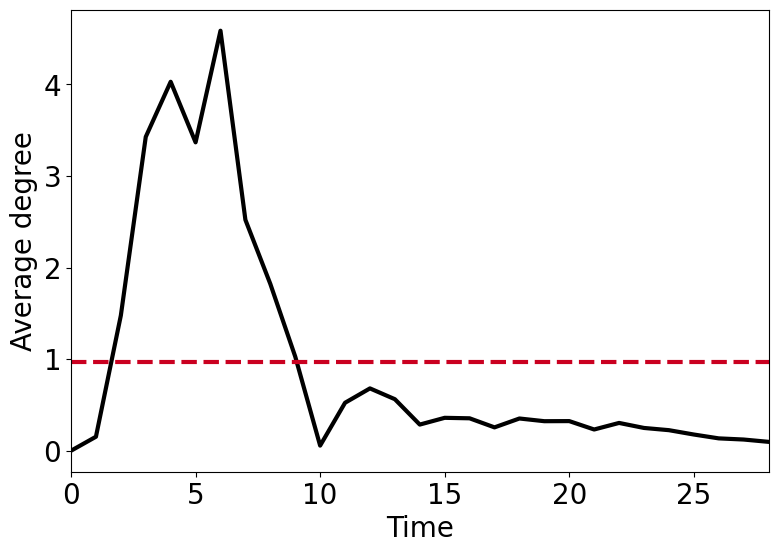

In [8]:
tgx.degree_over_time(dtdg, network_name=dataset.name)

### Number of Nodes Over Time

Plot the number of active nodes in each snapshot. x-axis is the snapshot id (or timestamps), y-axis is the active number of nodes

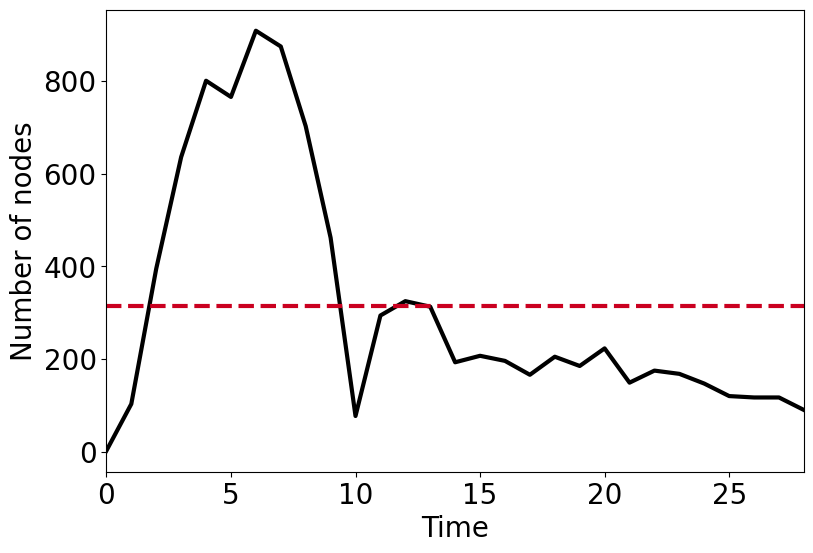

In [10]:
tgx.nodes_over_time(dtdg, network_name=dataset.name)

### Number of Edges Over Time

Plot the number of edges in each snapshot. x-axis is the snapshot id (or timestamps), y-axis is the number of edges

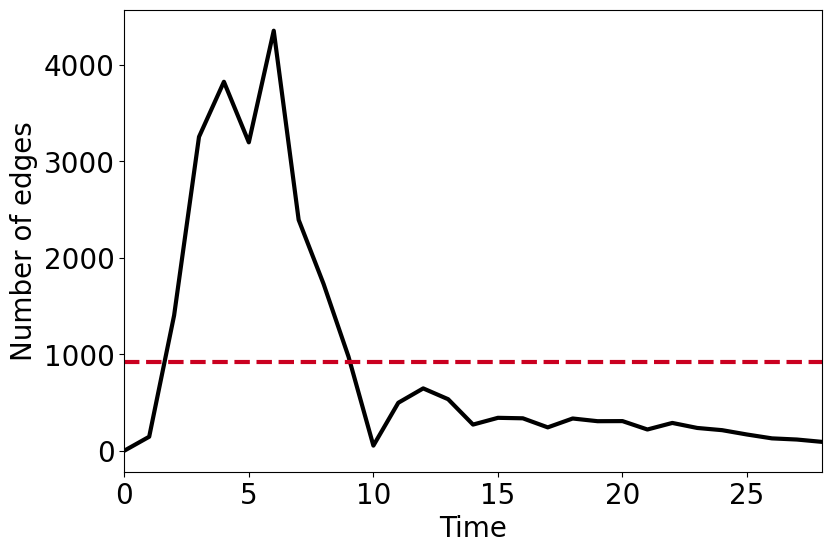

In [13]:
tgx.edges_over_time(dtdg, network_name=dataset.name)

### Number of Nodes and Edges Over Time

Plot the number of active nodes and edges in each snapshot. x-axis is the snapshot id (or timestamps), y-axis is the active number of nodes / edges.

Plotting number of nodes and edges per timestamp.


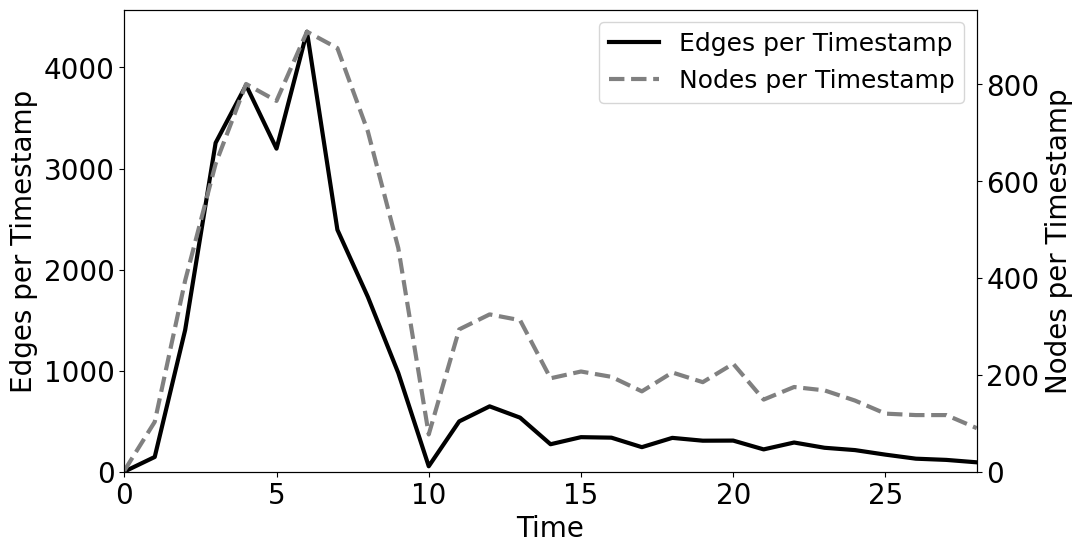

In [14]:
tgx.nodes_and_edges_over_time(dtdg, network_name=dataset.name)

### Number of Connected Components

Plot number of connected components per timestamp. x-axis is the snapshot id (or timestamps), y-axis is the number of connected components

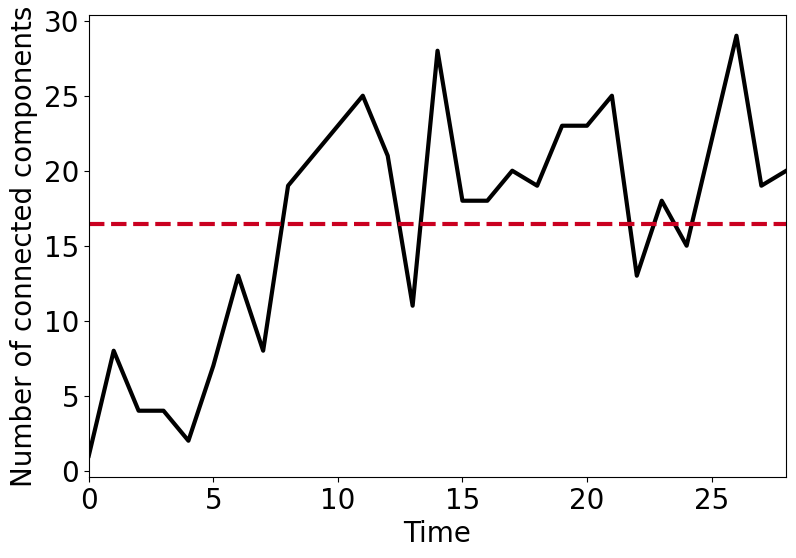

In [17]:
tgx.connected_components_per_ts(dtdg, network_name=dataset.name)

### TEA plot

TEA plots illustrate the portion of repeated edges and newly observed edges in each timestamp.

In [ ]:
tgx.TEA(data, network_name=dataset.name)

### TET plot

TET plots illustrate the reoccurrence pattern of edges over time time_scale.

In [ ]:
tgx.TET(data, 
        network_name=dataset.name, 
        figsize = (9, 5),
        axis_title_font_size = 24,
        ticks_font_size = 24)

### Node degree density plot

Plot the density map of node degrees over timestamps

In [ ]:
tgx.degree_density(data, network_name=dataset.name)

## Statistics

TGX provides several tools that are helpful in the statistical analysis of
temporal graphs. 

| Function | Description | Parameters | Returns
| --- | --- | --- | --- |
| ```get_reoccurrence``` | Calculate the recurrence index |  | ```List[float]``` |
| ```get_surprise``` | Calculate the surprise index |  | ```List[float]``` |
| ```get_novelty``` | Calculate the novelty index |  | ```List[float]``` |
| ```get_avg_node_activity``` | Calculate the average node activity |  | ```List[float]``` |
| ```get_avg_node_engagement``` | Calculate the average node engagement |  | ```List[float]``` |
| ```size_connected_components``` | Calculate the sizes of connected components |  |  ```List[List[float]]```|

You can use ```plot_for_snapshots``` for visualizing the statistics functions. 

<div class="alert alert-block alert-danger">
<b>Important:</b> A discretized graph should be provided as input.
</div>


### Average Node Engagement

Calculate the average node engagement over time. Node engagement represents the average number of distinct nodes that establish at least one new connection during each time step.

In [ ]:
node_engagement = get_avg_node_engagement(data)
plot_for_snapshots(node_engagement, y_title="node engagement", filename="./" + f"{dataset.name}_avg_node_engagement_per_ts")

### Average node Activity

Calculate the average node activity over time. Node activity represents the proportion of time steps a node is present.

In [ ]:
node_activity = get_avg_node_activity(data)
plot_for_snapshots(node_activity, y_title="node activity", filename="./" + f"{dataset.name}_avg_node_activity_per_ts")